# Rs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data=pd.read_csv('Auto_insurance_Claims_amount.csv',parse_dates=['Effective To Date'])
Data

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2011-02-10,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2011-02-12,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2011-02-06,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2011-02-03,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


# Exploratory Data Analysis

In [3]:
Data.shape

(9134, 26)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inc

Statistical Summury

In [5]:
Data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
Data.Country.value_counts()

US    9134
Name: Country, dtype: int64

This is the Auto_insurance data of USA only.As it is the dataset of only one country so we can drop the Country column.

In [7]:
Data['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [8]:
Data.State.value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [9]:
a=Data.groupby(['State']).get_group('Missouri')
a

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
10,SX51350,US,MO,Missouri,473.899202,No,Basic,College,2011-02-21,Unemployed,...,5,0,3,Personal Auto,Personal L3,Collision,Agent,482.400000,Four-Door Car,Small
11,VQ65197,US,MO,Missouri,819.719708,No,Basic,College,2011-01-06,Unemployed,...,87,0,3,Personal Auto,Personal L3,Hail,Agent,528.000000,SUV,Medsize
12,DP39365,US,MO,Missouri,879.879700,No,Premium,Master,2011-02-06,Employed,...,82,2,3,Corporate Auto,Corporate L1,Hail,Agent,472.029737,Four-Door Car,Medsize
14,IL66569,US,MO,Missouri,538.443166,No,Basic,College,2011-01-18,Employed,...,10,2,8,Corporate Auto,Corporate L3,Other,Call Center,307.139132,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2011-02-10,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2011-02-12,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2011-02-06,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2011-02-03,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [10]:
a['State Code'].value_counts()

MO    3150
Name: State Code, dtype: int64

In [11]:
b=Data.groupby(['State']).get_group('Iowa')
b['State Code'].value_counts()

IA    2601
Name: State Code, dtype: int64

In [12]:
c=Data.groupby(['State']).get_group('Nebraska')
c['State Code'].value_counts()

NE    1703
Name: State Code, dtype: int64

In [13]:
d=Data.groupby(['State']).get_group('Oklahoma')
d['State Code'].value_counts()

OK    882
Name: State Code, dtype: int64

In [14]:
e=Data.groupby(['State']).get_group('Kansas')
e['State Code'].value_counts()

KS    798
Name: State Code, dtype: int64

All the 5 states has their State codes.we drop any of them.

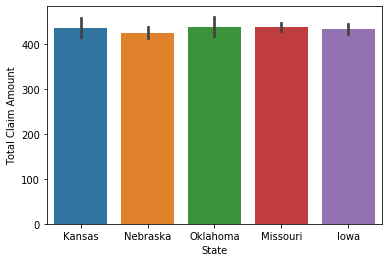

In [15]:
sns.barplot(x='State',y='Total Claim Amount',data=Data)

Oklahoma has the Highest Total Claim Amount.

In [16]:
Data.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

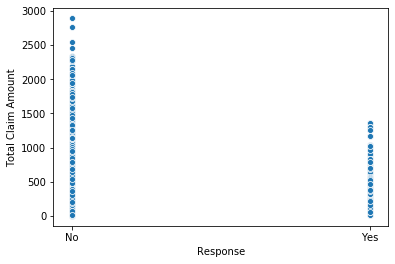

In [17]:
sns.scatterplot(x='Response',y='Total Claim Amount',data=Data)

In [18]:
Data.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

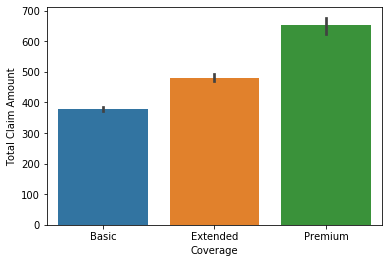

In [19]:
sns.barplot(x='Coverage',y='Total Claim Amount',data=Data)

Out of 3 types of Coverages Premium type has highest Total Claim Amount followed by Extended Coverage and Basic typy has lowest Total Claim Amount.

In [20]:
Data.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

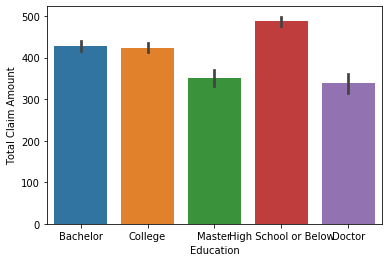

In [21]:
sns.barplot(x='Education',y='Total Claim Amount',data=Data)

The peoples with low education like School or Below has highest Total Claim Amount.

In [22]:
Data['Effective To Date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-01-28    169
2011-02-26    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-01-07    151
2011-01-25    151
2011-02-11    151
2011-01-08    149
2011-02-02    149
2011-02-18    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-13    145
2011-01-30    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-24    139
2011-02-16    139
2011-02-13    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

In [23]:
Date=pd.DataFrame()
Date['Month']=Data['Effective To Date'].dt.month_name()
Date['Day']=Data['Effective To Date'].dt.day_name()
Date['Total Claim Amount']=Data['Total Claim Amount']
Date

,Month,Day,Total Claim Amount
0,February,Thursday,384.811147
1,January,Monday,1131.464935
2,February,Saturday,566.472247
3,January,Thursday,529.881344
4,February,Thursday,138.130879
...,...,...,...
9129,February,Thursday,198.234764
9130,February,Saturday,379.200000
9131,February,Sunday,790.784983
9132,February,Thursday,691.200000


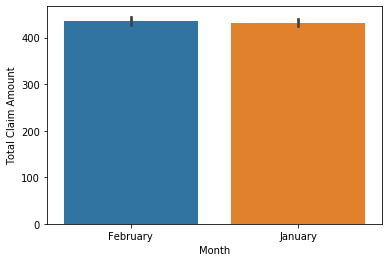

In [24]:
sns.barplot(x='Month',y='Total Claim Amount',data=Date)
plt.show()

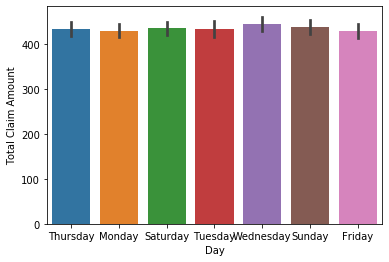

In [25]:
sns.barplot(x='Day',y='Total Claim Amount',data=Date)
plt.show()

In [26]:
Data.EmploymentStatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

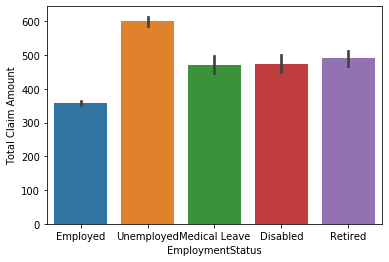

In [27]:
sns.barplot(x='EmploymentStatus',y='Total Claim Amount',data=Data)

From all the Employement type Unemployment people has highest Total Claim Amount

In [28]:
print('Min Salary: ',Data.Income.min(),'  Max Salary: ',Data.Income.max())

Min Salary:  0   Max Salary:  99981


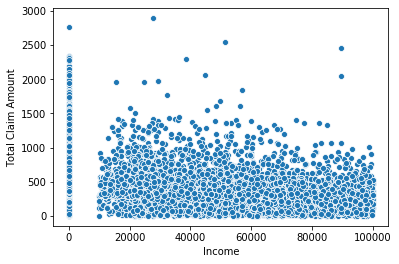

In [29]:
sns.scatterplot(x='Income',y='Total Claim Amount',data=Data)

In [30]:
Data.Gender.value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

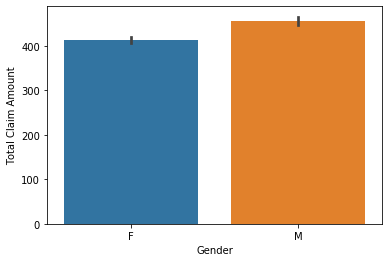

In [31]:
sns.barplot(x='Gender',y='Total Claim Amount',data=Data)

Male People has highest Total Claim Amount than Females.

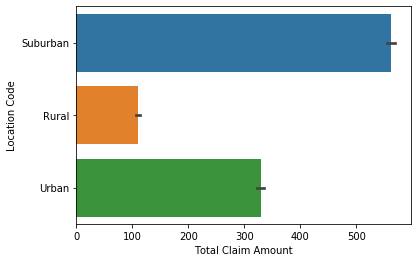

In [32]:
sns.barplot(x='Total Claim Amount',y='Location Code',data=Data)

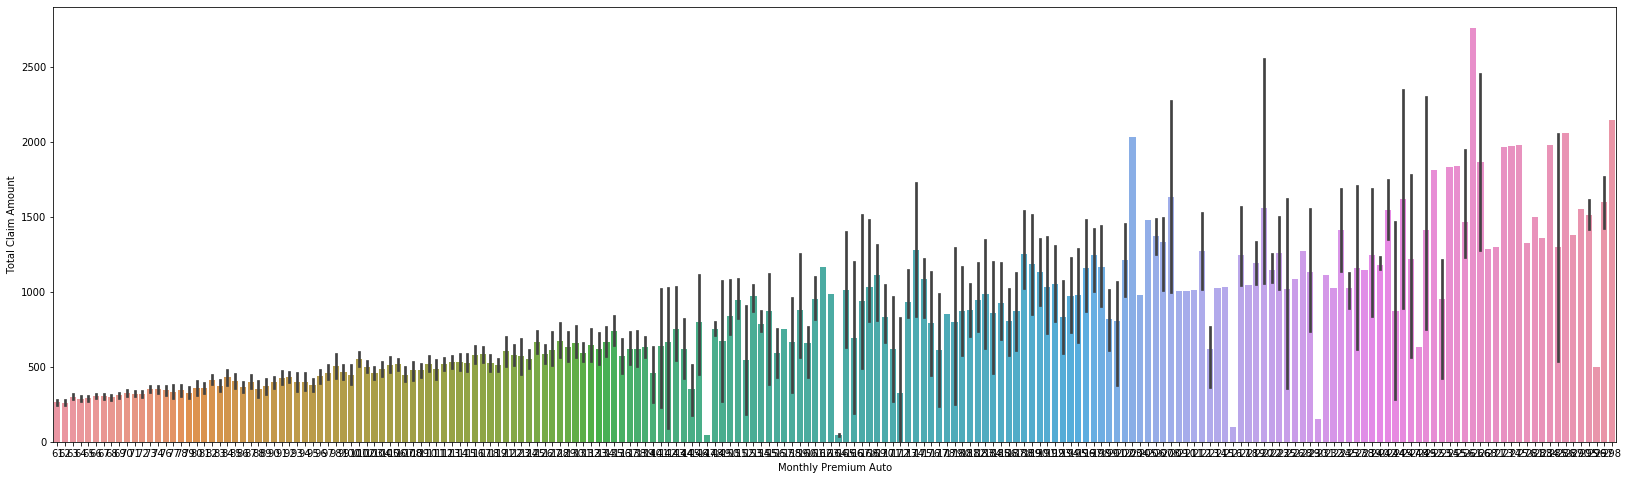

In [33]:
plt.figure(figsize=(28,8))
sns.barplot(x='Monthly Premium Auto',y='Total Claim Amount',data=Data)

more the Monthly Premium Auto more is the Total Claim Amount

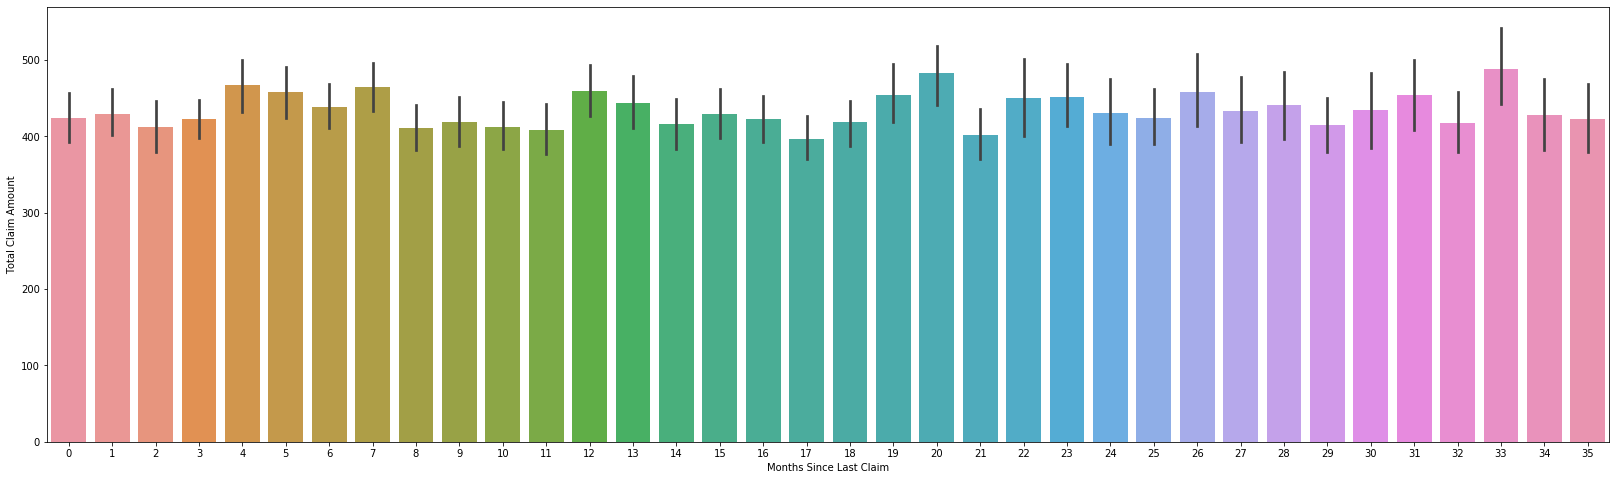

In [34]:
plt.figure(figsize=(28,8))
sns.barplot(x='Months Since Last Claim',y='Total Claim Amount',data=Data)

Total Claim not depends on Months Since last Claim.

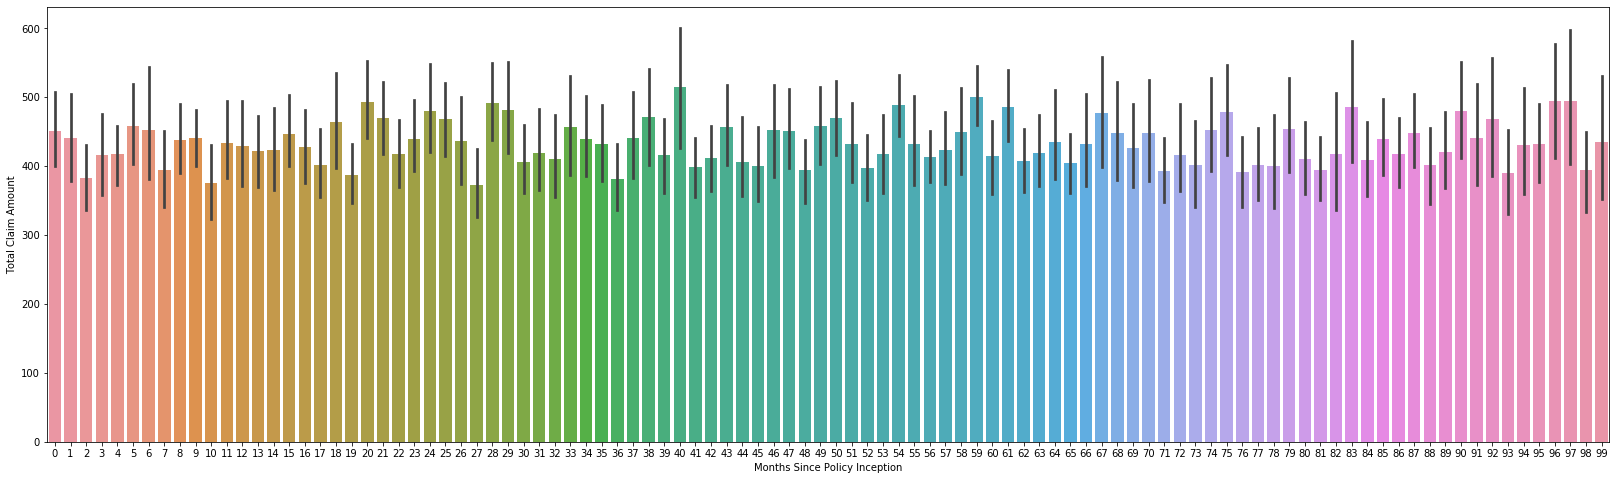

In [35]:
plt.figure(figsize=(28,8))
sns.barplot(x='Months Since Policy Inception',y='Total Claim Amount',data=Data)

 Total Claim not depends on Months Since Policy Inception.

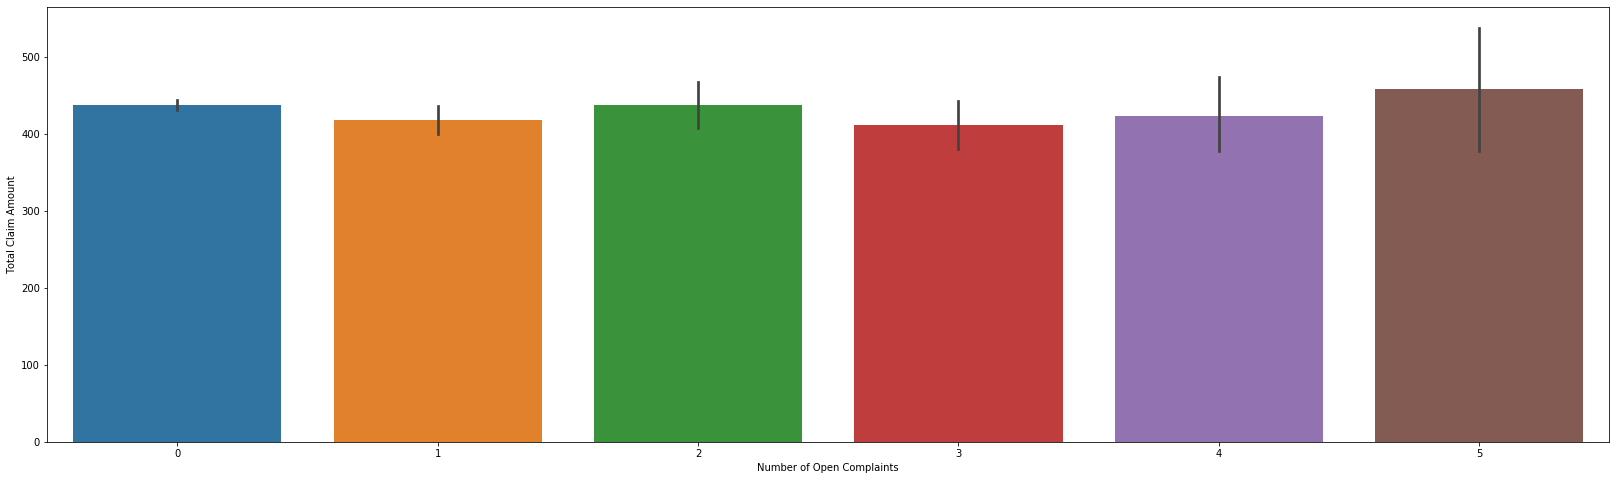

In [36]:
plt.figure(figsize=(28,8))
sns.barplot(x='Number of Open Complaints',y='Total Claim Amount',data=Data)

When the Number of Open Complaints are 5 Total claim Amount is heigest

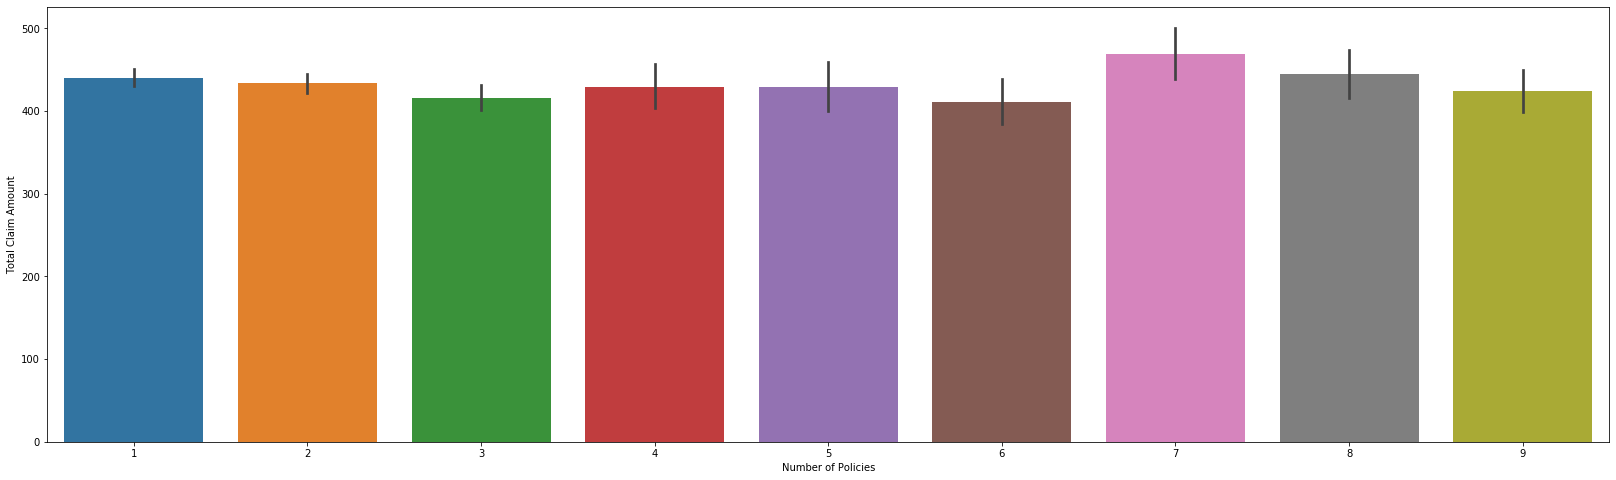

In [37]:
plt.figure(figsize=(28,8))
sns.barplot(x='Number of Policies',y='Total Claim Amount',data=Data)

In [38]:
Data['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

Most of the peoples have taken Personal Auto Policy,followed by Corporate and very less people have teken Special Auto Policy.

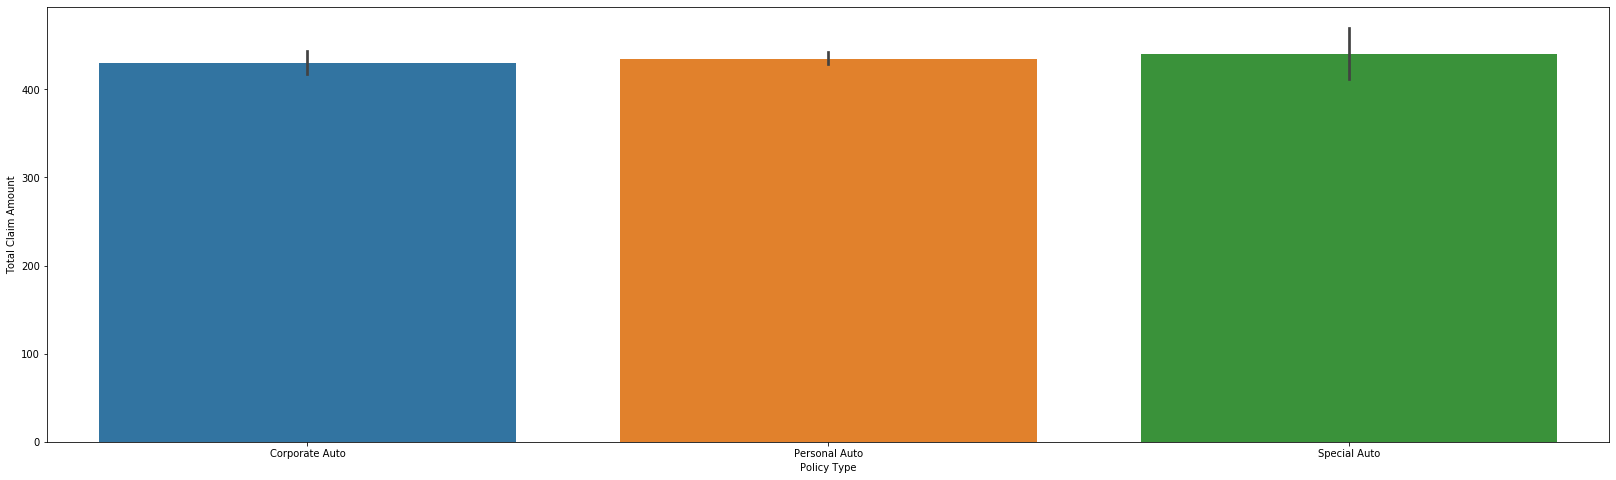

In [39]:
plt.figure(figsize=(28,8))
sns.barplot(x='Policy Type',y='Total Claim Amount',data=Data)

Total Claim Amount is some how more in  the cases of Special Auto 

In [40]:
Data.Policy.value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

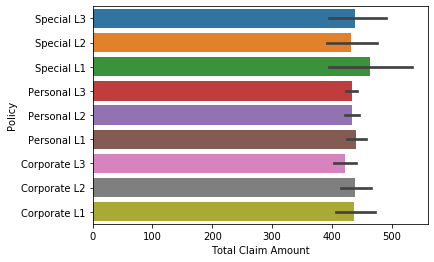

In [41]:
Pol=Data.sort_values(by='Policy',ascending=False)
sns.barplot(x='Total Claim Amount',y='Policy',data=Pol)

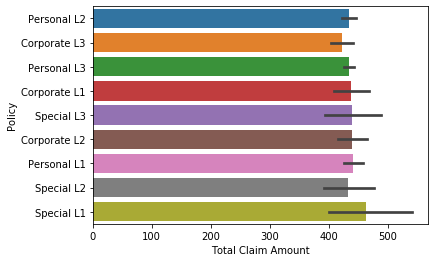

In [42]:
Pol=Data.sort_values(by='Total Claim Amount',ascending=False)
sns.barplot(x='Total Claim Amount',y='Policy',data=Pol)

Three types of policy available in every Policy type among them Special L1 has the heighest Total Claim Amount.

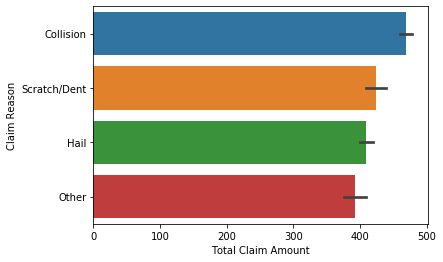

In [43]:
sns.barplot(x='Total Claim Amount',y='Claim Reason',data=Data)

Collision claim Reason has heighest Total Claim Amount.

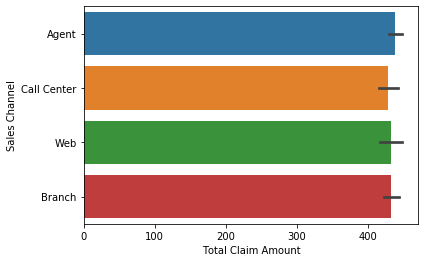

In [44]:
sns.barplot(x='Total Claim Amount',y='Sales Channel',data=Data)
plt.show()

Total Claim amount is heighest in case of Sales Channel is Agent

In [45]:
Data['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

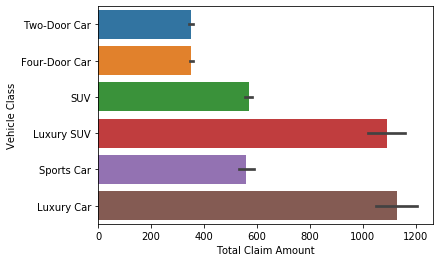

In [46]:
sns.barplot(x='Total Claim Amount',y='Vehicle Class',data=Data)

From the all vehicle classes Luxury Car has the heighest Total Claim Amount followed by Luxury SUV,SUV and Sports Car.

In [47]:
Data['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

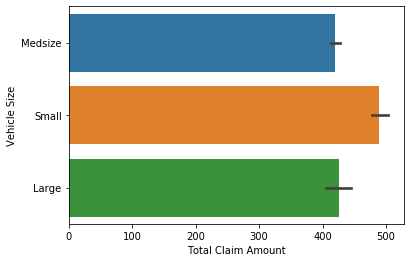

In [48]:
sns.barplot(x='Total Claim Amount',y='Vehicle Size',data=Data)

Small Vahicles has heighest Total Claim Amount

In [49]:
#Dropping the redundant columns
Data=Data.drop(['Customer'],axis=1)
Data=Data.drop(['Country'],axis=1)
Data=Data.drop(['State Code'],axis=1)
Data=Data.drop(['Effective To Date'],axis=1)
Data

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,2340.598798,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,Missouri,309.651122,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,Missouri,816.389043,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,Missouri,752.444244,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


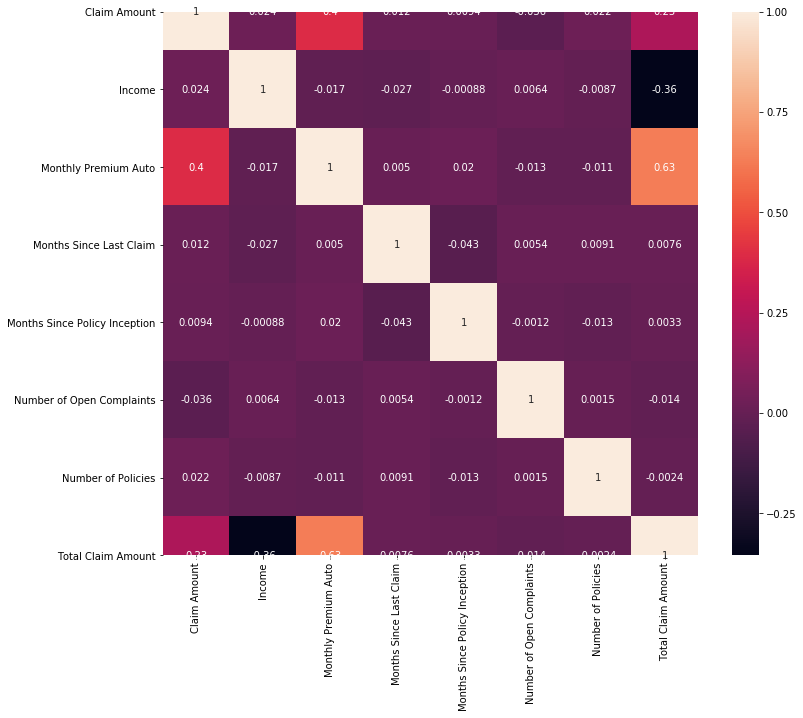

In [50]:
cor=Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

Total Claim Amount is Highly positively correlated with Claim amount and Monthly Premium Auto and highly negatively correlated with Income.

In [51]:
list1=['State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in list1:
    Data[i]=Le.fit_transform(Data[i])

In [52]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
State                            9134 non-null int32
Claim Amount                     9134 non-null float64
Response                         9134 non-null int32
Coverage                         9134 non-null int32
Education                        9134 non-null int32
EmploymentStatus                 9134 non-null int32
Gender                           9134 non-null int32
Income                           9134 non-null int64
Location Code                    9134 non-null int32
Marital Status                   9134 non-null int32
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null int32
Policy                           9134 non-n

# Checking For Outliers

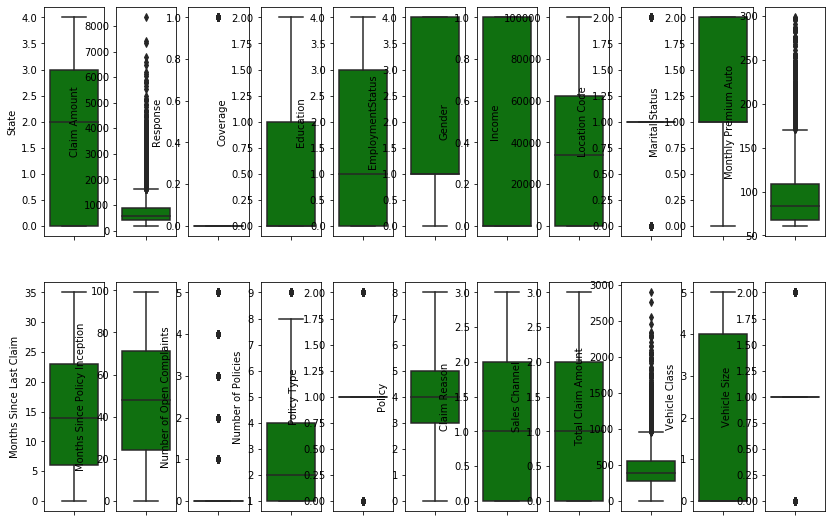

In [53]:
collist=Data.columns
col=14
row=11
plt.figure(figsize=(col,5*col))
for i in range(0,len(collist)):
    plt.subplot(col,row,i+1)
    sns.boxplot(Data[collist[i]],orient='v',color='green')
    plt.tight_layout

Outliers present in Response,Monthly Premium Auto,Total Claim amount

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[0.55068994, 0.76287773, 0.40882171, ..., 0.16963969, 1.49918077,
        0.16668206],
       [0.97332215, 0.14924546, 0.40882171, ..., 2.400737  , 0.91292371,
        0.16668206],
       [1.73532819, 0.71063622, 0.40882171, ..., 0.45573376, 1.49918077,
        0.16668206],
       ...,
       [0.21131611, 0.02313483, 0.40882171, ..., 1.22793667, 0.91292371,
        0.16668206],
       [0.21131611, 0.06993547, 0.40882171, ..., 0.88511256, 0.91292371,
        2.0278971 ],
       [0.21131611, 0.78495478, 0.40882171, ..., 0.22200449, 1.49918077,
        0.16668206]])

In [55]:
#Removing the Outliers
Data_new=Data[(z<3).all(axis=1)]
Data_new

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,276.351928,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,4,0,0,1,2,...,42,0,8,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,0,0,1,1,71941,2,1,...,89,0,2,1,3,1,3,198.234764,0,1
9130,2,309.651122,1,1,1,1,0,21604,1,0,...,28,0,1,0,2,0,1,379.200000,0,1
9131,2,816.389043,0,1,0,4,1,0,1,2,...,37,3,2,0,1,0,1,790.784983,0,1
9132,2,752.444244,0,1,1,1,1,21941,1,1,...,3,0,3,1,4,3,1,691.200000,0,0


In [56]:
print(Data.shape)
print(Data_new.shape)

(9134, 22)
(8470, 22)


# Checking for Skewness

In [57]:
Data_new.skew()

State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Total Claim Amount               0.709643
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [58]:
list2=['Claim Amount','Response','Coverage','EmploymentStatus','Monthly Premium Auto','Number of Open Complaints','Number of Policies','Claim Reason','Total Claim Amount']
for i in list2:
    Data_new[i]=np.sqrt(Data_new[i])

In [59]:
Data_new.skew()

State                            0.019194
Claim Amount                     1.069550
Response                         2.030625
Coverage                         0.637514
Education                        0.337866
EmploymentStatus                 0.096940
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.973258
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        1.871949
Number of Policies               0.834717
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.024930
Sales Channel                    0.503296
Total Claim Amount              -0.336015
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [60]:
#Splitting the dataset into train and test dataset
df_x=Data_new.drop(['Total Claim Amount'],axis=1)
df_x

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,1,16.623836,0.0,0.000000,0,1.0,0,56274,1,1,...,32,5,0.000000,1.000000,0,2,0.000000,0,5,1
1,3,26.418811,0.0,1.000000,0,2.0,0,0,1,2,...,13,42,0.000000,2.828427,1,5,1.732051,0,0,1
2,4,35.899069,0.0,1.414214,0,1.0,0,48767,1,1,...,18,38,0.000000,1.414214,1,5,0.000000,0,5,1
3,2,27.651152,0.0,0.000000,0,2.0,1,0,1,1,...,18,65,0.000000,2.645751,0,1,0.000000,2,3,1
4,1,16.774065,0.0,0.000000,0,1.0,1,43836,0,2,...,12,44,0.000000,1.000000,1,3,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,48.379735,0.0,0.000000,0,1.0,1,71941,2,1,...,18,89,0.000000,1.414214,1,3,1.000000,3,0,1
9130,2,17.596907,1.0,1.000000,1,1.0,0,21604,1,0,...,14,28,0.000000,1.000000,0,2,0.000000,1,0,1
9131,2,28.572523,0.0,1.000000,0,2.0,1,0,1,2,...,9,37,1.732051,1.414214,0,1,0.000000,1,0,1
9132,2,27.430717,0.0,1.000000,1,1.0,1,21941,1,1,...,34,3,0.000000,1.732051,1,4,1.732051,1,0,0


In [61]:
y=Data_new.loc[:,['Total Claim Amount']].values.reshape(-1,1)
y

array([[19.61660386],
       [33.63725516],
       [23.80067745],
       ...,
       [28.1208994 ],
       [26.29068276],
       [19.22498375]])

In [62]:
#Scale standardly to the train dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,-0.551121,-1.107239,-0.409822,-0.763792,-1.120269,-0.487255,-0.978045,0.604143,0.037243,-0.186015,...,1.683302,-1.535241,-0.464064,-0.953478,-1.717870,-1.109423,-1.127831,-1.035286,1.478254,-0.162023
1,0.974119,0.114185,-0.409822,1.089651,-1.120269,1.477330,-0.978045,-1.244638,0.037243,1.394274,...,-0.204683,-0.208285,-0.464064,1.916669,0.372999,0.755394,1.454417,-1.035286,-0.892124,-0.162023
2,1.736738,1.296365,-0.409822,1.857372,-1.120269,-0.487255,-0.978045,0.357514,0.037243,-0.186015,...,0.292155,-0.351739,-0.464064,-0.303273,0.372999,0.755394,-1.127831,-1.035286,1.478254,-0.162023
3,0.211499,0.267857,-0.409822,-0.763792,-1.120269,1.477330,1.022448,-1.244638,0.037243,-0.186015,...,0.292155,0.616580,-0.464064,1.629916,-1.717870,-1.731029,-1.127831,0.836205,0.530103,-0.162023
4,-0.551121,-1.088506,-0.409822,-0.763792,-1.120269,-0.487255,1.022448,0.195515,-1.597204,1.394274,...,-0.304051,-0.136557,-0.464064,-0.953478,0.372999,-0.487818,-1.127831,-1.035286,-0.892124,-0.162023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,0.211499,2.852692,-0.409822,-0.763792,-1.120269,-0.487255,1.022448,1.118854,1.671690,-0.186015,...,0.292155,1.477309,-0.464064,-0.303273,0.372999,-0.487818,0.363031,1.771950,-0.892124,-0.162023
8466,0.211499,-0.985898,2.440087,1.089651,-0.397212,-0.487255,-0.978045,-0.534877,0.037243,-1.766304,...,-0.105316,-0.710376,-0.464064,-0.953478,-1.717870,-1.109423,-1.127831,-0.099540,-0.892124,-0.162023
8467,0.211499,0.382751,-0.409822,1.089651,-1.120269,1.477330,1.022448,-1.244638,0.037243,1.394274,...,-0.602154,-0.387603,3.060484,-0.303273,-1.717870,-1.731029,-1.127831,-0.099540,-0.892124,-0.162023
8468,0.211499,0.240369,-0.409822,1.089651,-0.397212,-0.487255,1.022448,-0.523806,0.037243,-0.186015,...,1.882037,-1.606969,-0.464064,0.195648,0.372999,0.133788,1.454417,-0.099540,-0.892124,-2.024073


# Now Training and testing datasets are ready for Machine learning

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
max_r2_score=0
for i in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=i,test_size=0.20)
    Lr=LinearRegression()
    Lr.fit(train_x,train_y)
    pred=Lr.predict(test_x)
    r2_scr=r2_score(pred,test_y)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=i
    print('Max R2 score corresponding to ',final_r_state,' is ',max_r2_score)       

Max R2 score corresponding to  42  is  0.15161912646221853
Max R2 score corresponding to  42  is  0.15161912646221853
Max R2 score corresponding to  42  is  0.15161912646221853
Max R2 score corresponding to  45  is  0.17543196721058085
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  46  is  0.19521397272700725
Max R2 score corresponding to  58  is  0.199941568962066

In [64]:
#Checking if the model is is under or overfitting
a_score=cross_val_score(Lr,x,y,cv=10,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.55015806 0.54449338 0.49526578 0.54913751 0.52411438 0.5311262
 0.5383514  0.54784606 0.54427964 0.50664431]
0.5331416722412243


In [65]:
#Final LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=94,test_size=0.25)
Lr=LinearRegression()
Lr.fit(train_x,train_y)
Lrpred=Lr.predict(test_x)
print("Predicted Total Claim Amount ",Lrpred)

Predicted Total Claim Amount  [[23.54259744]
 [27.5695874 ]
 [22.56416237]
 ...
 [26.04145707]
 [20.54950865]
 [17.05370374]]


In [66]:
print('R2 Score',r2_score(Lrpred,test_y))
print('Mean Absolute Error',mean_absolute_error(Lrpred,test_y))
print('Mean Squared Error',mean_squared_error(Lrpred,test_y))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Lrpred,test_y)))

R2 Score 0.21828527181824608
Mean Absolute Error 3.3189150144754156
Mean Squared Error 17.643845181148397
Root Mean Squared Error 4.2004577347175385


In [67]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','linear','poly']}
gd_sr=GridSearchCV(estimator=sv,param_grid=param,cv=10,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'kernel': 'rbf'}
0.7522720431971481


In [68]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mse','mae','friedman_mse']}
gd_sr=GridSearchCV(estimator=dt,param_grid=param,cv=10,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'criterion': 'mse'}
0.7010888673480828


In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,200,300,400]}
gd_sr=GridSearchCV(estimator=knn,param_grid=param,cv=10,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_neighbors': 50}
0.587609997289921


Checking the Score by Ensembleing Methods

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=rf,param_grid=param,cv=10,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 300}
0.8460032091742383


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=gbr,param_grid=param,cv=10,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 200}
0.8395618980119105


From all the models RandomForestRegressor has the heighest r2 score 0.8460032091742383 (84.60%).So we will save this model for production and save the prediction.

In [72]:
rf=RandomForestRegressor(n_estimators=300)
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)
print('Predicted Total Claim Amount',rfpred)
print('\n')
print('R2 Score',r2_score(rfpred,test_y))
print('Mean Absolute Error',mean_absolute_error(rfpred,test_y))
print('Mean Squared Error',mean_squared_error(rfpred,test_y))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(rfpred,test_y)))

Predicted Total Claim Amount [26.2180593  29.74717346 24.43928679 ... 21.55141932 15.87807863
 21.21649238]


R2 Score 0.8492569138866259
Mean Absolute Error 1.7145525524896317
Mean Squared Error 5.529613743837301
Root Mean Squared Error 2.3515130754127864


In [73]:
test1=np.array([1,256,2,62,2,2,1,223,1,1,89,1,13,2,3,1,1,2,1,2,1]).reshape(1,-1)
rf.predict(test1)

array([26.68396991])

In [74]:
test2=np.array([3,116,2,2,2,2,1,213,2,2,19,1,23,1,3,1,5,2,1,6,1]).reshape(1,-1)
rf.predict(test2)

array([26.73532968])

In [75]:
#Saving the prediction
df=pd.DataFrame(rfpred)
df.to_csv('Auto_insurance_claim_pred.csv')

In [76]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(rf,'Auto_insurance_claim_pred.obj')

C:\Users\Biranchi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Auto_insurance_claim_pred.obj']